# Transient space-charge-limited current with trapping

This example roughly reproduces Fig. 5 from A. Many and G. Rakavy [Theory of Transient Space-Charge-Limited Currents in Solids in the Presence of Trapping](https://doi.org/10.1103/PhysRev.126.1980), Phys. Rev. 126, 1980 (1962).

The agreement is not a perfect, because a drift-only problem is considered in the original work. Here, the influence of diffusion is minimized by setting temperature to low value (such as 1 K).

Also, in the original paper the traps cannot release charges and cannot be filled. This is simulated by assuming large trap depth (1 eV) and trap concentration much higher than transport state concentration.


In [1]:
%matplotlib inline

In [2]:
import matplotlib.pylab as plt
from oedes import *

In [3]:
L = 1e-6
voltage = 1e3
mu = 1e-15
epsilon_r = 1.
params = {
    'T': 1,
    'electrode0.workfunction': 0,
    'electrode1.workfunction': 0,
    'hole.level': 0,
    'hole.mu': mu,
    'hole.N0': 1e27,
    'electrode0.voltage': voltage,
    'electrode1.voltage': 0,
    'epsilon_r': epsilon_r,
    'hole.trap.level': -1.,
    'hole.trap.trate': 0.,
    'hole.trap.N0': 1e30
}

In [4]:
model = models.std.holeonly(L, traps=['trap'])

In [5]:
t0 = functions.physics.ManyRakavy(
    mu, voltage, L) / functions.physics.ManyRakavy_t1
j0 = functions.physics.MottGurney(epsilon_r, mu, voltage, L)

In [6]:
reltol = 1e-5  # decrease to increase quality and runtime

tau=1e+100 time=5                   

tau=5 time=5                   

tau=2 time=5                   

tau=1.0 time=5                   

tau=0.5 time=5                   

tau=0.25 time=5                   

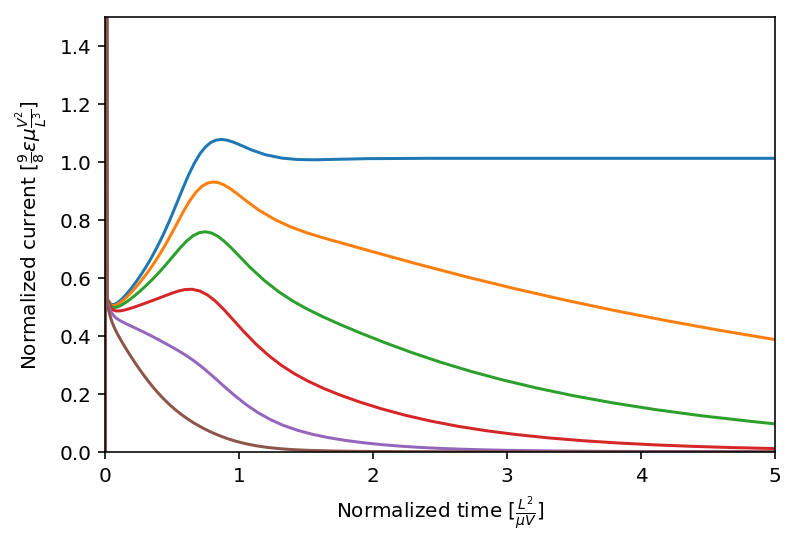

In [8]:
for tau in [1e100, 5, 2, 1., 0.5, 0.25]:
    params['hole.trap.trate'] = 1. / (tau * params['hole.trap.N0'])
    c = context(model)
    with progressinfo('tau=%s' % tau):
        c.transient(params, 5, 1e-1, reltol=reltol)
    t, j = c.teval('time', 'J')
    plt.plot(t / t0, j / j0, label=tau)
    testing.store(j, rtol=1e-5)
plt.ylim([0, 1.5])
plt.xlim([0, 5])
plt.xlabel(r'Normalized time [$\frac{L^2}{\mu V}$]')
plt.ylabel(
    r'Normalized current [$\frac{9}{8}\varepsilon \mu \frac{V^2}{L^3}$]')
plt.show()


---
This file is a part of __oedes__, an open source organic electronic device 
simulator. For more information, see <https://www.github.com/mzszym/oedes>.
